In [1]:
%matplotlib inline

import cosima_cookbook as cc
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import pandas as pd
import cmocean as cm
import cartopy.crs as ccrs
import cartopy.feature as cft
import sys, os

import logging
logging.captureWarnings(True)
logging.getLogger('py.warnings').setLevel(logging.ERROR)

from dask.distributed import Client

netcdf_index loaded.


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [4]:
## This is the method we use to get around memory issues. To implement, use:
## dask-scheduler # get the tcp code from this call in a jupyter new terminal, then run command below in a another terminal
## dask-worker tcp://10.0.64.4:8786 --memory-limit 4e9 --nprocs 6 --nthreads 1 --local-directory /local/g40/amh157
client=Client('tcp://10.0.64.9:8786', local_dir='/local/v45/pas561')
client

Client Scheduler: tcp://10.0.64.9:8786 Dashboard: http://10.0.64.9:8787/status,Cluster Workers: 6 Cores: 6 Memory: 24.00 GB


In [ ]:
#create land sea mask
##old fashioned way
NYFCntrlDir = '/g/data3/hh5/tmp/cosima/access-om2/1deg_jra55v13_iaf_spinup1_B1_lastcycle/output048/ocean'

Ocean_File = os.path.join(NYFCntrlDir,'ocean.nc')
#print(Ocean_File)
cntrl=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='time',decode_times=False).load()
potrho=cntrl.potrho.load()
yu_ocean=cntrl.yu_ocean.load()
print(yu_ocean.shape)
print(potrho.shape)

#msk=np.zeros((kmu.shape[0],kmu.shape[1]),dtype=float)
#msk.fill(np.nan)
#msk[np.where(kmu>=1)]=1

/g/data1/v45/pas561/access-om2_amoc/om2_1_amoc_mask.nc
(1, 300, 360)
(300, 360)
<xarray.DataArray 'kmu' (xu_ocean: 360)>
array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)
Coordinates:
  * xu_ocean  (xu_ocean) float64 -279.0 -278.0 -277.0 -276.0 ... 78.0 79.0 80.0
    yu_ocean  float64 67.75
Attributes:
    long_name:     number of depth levels on u-grid
    units:         dimensionless
    valid_range:   [-1.e+01  1.e+09]
    cell_methods:  time: point
    coordinates:   geolon_c geolat_c
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

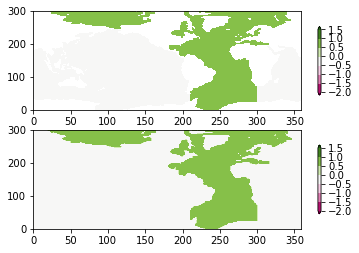

In [21]:
#read in amoc mask
NYFCntrlDir = '/g/data1/v45/pas561/access-om2_amoc/'

Ocean_File = os.path.join(NYFCntrlDir,'om2_1_amoc_mask.nc')
print(Ocean_File)
cntrl=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='time',decode_times=False)
print(cntrl.kmu.shape)
mask=cntrl.kmu[0].load()

plt.subplot(211)
clev = np.arange(-2,2,0.5)
plt.contourf(mask,cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)

print(mask.shape)
print(mask[250,:])

mask=np.nan_to_num(mask)
print(mask[250,:])

plt.subplot(212)
clev = np.arange(-2,2,0.5)
plt.contourf(mask,cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)


Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db
Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db
 ------ Here is what the initial dataset looks like ------ 
<xarray.DataArray 'ty_trans_rho' (time: 60, potrho: 80, grid_yu_ocean: 300, grid_xt_ocean: 360)>
dask.array<shape=(60, 80, 300, 360), dtype=float32, chunksize=(1, 27, 100, 120)>
Coordinates:
  * potrho         (potrho) float64 1.028e+03 1.028e+03 ... 1.038e+03 1.038e+03
  * grid_yu_ocean  (grid_yu_ocean) float64 -77.75 -77.51 -77.26 ... 89.55 90.0
  * grid_xt_ocean  (grid_xt_ocean) float64 -279.5 -278.5 -277.5 ... 78.5 79.5
  * time           (time) datetime64[ns] 1958-07-03T12:00:00 ... 2017-07-02T12:00:00
<xarray.DataArray 'ty_trans_rho_gm' (time: 60, potrho: 80, grid_yu_ocean: 300, grid_xt_ocean: 360)>
dask.array<shape=(60, 80, 300, 360), dtype=float32, chunksize=(1, 80, 100, 120)>
Coordinates:
  * potrho         (potrho) float64 1.028e+03 1.028e+03 ... 1.038

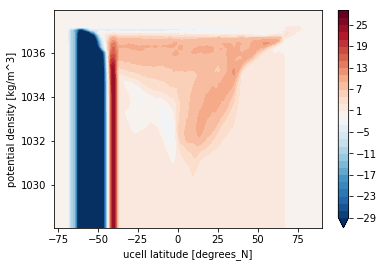

In [34]:
expt = '1deg_jra55v13_iaf_spinup1_B1'  ## choosing our 1 degree experiment
n_files = -12                          ## Last 12 files is last 60 years
time_units = 'days since 1718-01-01'   ## These are to give correct dates
offset = -87658

psi = cc.get_nc_variable(expt,'ocean.nc','ty_trans_rho',
                                        n=n_files,time_units=time_units, offset=offset)

psi=psi*mask

psiGM = cc.get_nc_variable(expt, 'ocean.nc', 'ty_trans_rho_gm',
                              chunks={'potrho': None}, n=n_files,
                              time_units=time_units, offset=offset)

psiGM=psiGM*mask

print(' ------ Here is what the initial dataset looks like ------ ')
print(psi)
print(psiGM)
print(' --------------------------------------------------------- ')
print(' ')

psiGM = psiGM.sum('grid_xt_ocean')*1.0e-9
psi = psi.sum('grid_xt_ocean')*1.0e-9
psi = psi.cumsum('potrho') -  psi.sum('potrho')

psi_net = psi + psiGM

#print(' ------ Here is what the resampled dataset looks like ------ ')
print(psi_net)
#print(' --------------------------------------------------------- ')
#print(' ')

## Plot the mean for the North Atlantic region
psi_net.mean('time').plot.contourf(levels=np.arange(-29,30,2))

## Save the whole dataset
psi.to_netcdf('AMOC_rho_net_1deg.nc')
psi.to_netcdf('AMOC_rho_adv_1deg.nc')
psiGM.to_netcdf('AMOC_rho_GM_1deg.nc')

Text(0.5, 1.0, 'Control')

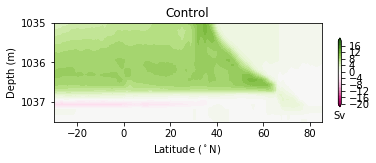

In [33]:
clev = np.arange(-20,20,1)
plt.subplot(211)
plt.contourf(yu_ocean,potrho,psi_net.mean('time'),cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
plt.ylim((1037.5,1035))
plt.ylabel('Depth (m)')
plt.xlabel('Latitude ($^\circ$N)')
plt.xlim([-30,85])
plt.title('Control')

Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db
 ------ Here is what the initial dataset looks like ------ 
<xarray.DataArray 'ty_trans' (time: 60, st_ocean: 50, yu_ocean: 300, xt_ocean: 360)>
dask.array<shape=(60, 50, 300, 360), dtype=float32, chunksize=(1, 25, 150, 180)>
Coordinates:
  * st_ocean  (st_ocean) float64 1.152 3.649 6.565 ... 5.034e+03 5.254e+03
  * yu_ocean  (yu_ocean) float64 -77.75 -77.51 -77.26 -77.01 ... 89.1 89.55 90.0
  * xt_ocean  (xt_ocean) float64 -279.5 -278.5 -277.5 -276.5 ... 77.5 78.5 79.5
  * time      (time) datetime64[ns] 1958-07-03T12:00:00 ... 2017-07-02T12:00:00
 --------------------------------------------------------- 
 


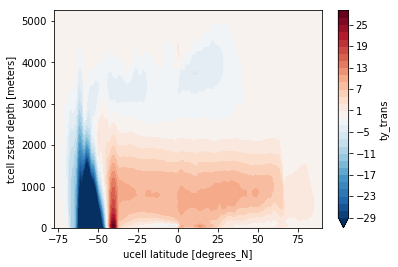

In [39]:
expt = '1deg_jra55v13_iaf_spinup1_B1'  ## choosing our 1 degree experiment
n_files = -12                          ## Last 12 files is last 60 years
time_units = 'days since 1718-01-01'   ## These are to give correct dates
offset = -87658

psi = cc.get_nc_variable(expt,'ocean.nc','ty_trans',
                                        n=n_files,time_units=time_units, offset=offset)

psi=psi*mask

#missing GM in z space
#psiGM = cc.get_nc_variable(expt, 'ocean.nc', 'ty_trans_gm',
#                              chunks={'st_ocean': None}, n=n_files,
#                              time_units=time_units, offset=offset)

#psiGM=psiGM*mask

print(' ------ Here is what the initial dataset looks like ------ ')
print(psi)
#print(psiGM)
print(' --------------------------------------------------------- ')
print(' ')

#psiGM = psiGM.sum('grid_xt_ocean')*1.0e-9
psi = psi.sum('xt_ocean')*1.0e-9
psi = psi.cumsum('st_ocean') -  psi.sum('st_ocean')

#psi_net = psi + psiGM

#print(' ------ Here is what the resampled dataset looks like ------ ')
#print(psi_net)
#print(' --------------------------------------------------------- ')
#print(' ')

## Plot the mean for the North Atlantic region
psi.mean('time').plot.contourf(levels=np.arange(-29,30,2))

## Save the whole dataset
psi.to_netcdf('AMOC_z_adv_1deg.nc')


In [3]:
NYFCntrlDir = '/g/data3/hh5/tmp/cosima/access-om2-025/025deg_jra55v13_iaf_gmredi6/output153/ocean'


Ocean_File = os.path.join(NYFCntrlDir,'ocean.nc')
#print(Ocean_File)
cntrl=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='time',decode_times=False).load()
potrho=cntrl.potrho.load()
yu_ocean=cntrl.yu_ocean.load()
print(yu_ocean.shape)
print(potrho.shape)

(1080,)
(80,)


/g/data1/v45/pas561/access-om2_amoc/om2_025_amoc_mask.nc
(1, 1080, 1440)
(1080, 1440)


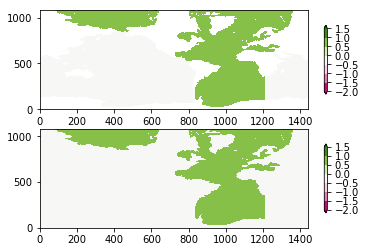

In [4]:
#read in amoc mask
NYFCntrlDir = '/g/data1/v45/pas561/access-om2_amoc/'

Ocean_File = os.path.join(NYFCntrlDir,'om2_025_amoc_mask.nc')
print(Ocean_File)
cntrl=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='time',decode_times=False)
print(cntrl.kmu.shape)
mask=cntrl.kmu[0].load()

plt.subplot(211)
clev = np.arange(-2,2,0.5)
plt.contourf(mask,cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)

print(mask.shape)
#print(mask[250,:])

mask=np.nan_to_num(mask)
#print(mask[250,:])

plt.subplot(212)
clev = np.arange(-2,2,0.5)
plt.contourf(mask,cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)


Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db
Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db
 ------ Here is what the initial dataset looks like ------ 
<xarray.DataArray 'ty_trans_rho' (time: 60, potrho: 80, grid_yu_ocean: 1080, grid_xt_ocean: 1440)>
dask.array<shape=(60, 80, 1080, 1440), dtype=float32, chunksize=(1, 14, 216, 288)>
Coordinates:
  * grid_yu_ocean  (grid_yu_ocean) float64 -81.02 -80.92 -80.81 ... 89.89 90.0
  * grid_xt_ocean  (grid_xt_ocean) float64 -279.9 -279.6 -279.4 ... 79.62 79.88
  * potrho         (potrho) float64 1.028e+03 1.028e+03 ... 1.038e+03 1.038e+03
  * time           (time) datetime64[ns] 1958-07-01T12:00:00 ... 2017-06-30T12:00:00
<xarray.DataArray 'ty_trans_rho_gm' (time: 60, potrho: 80, grid_yu_ocean: 1080, grid_xt_ocean: 1440)>
dask.array<shape=(60, 80, 1080, 1440), dtype=float32, chunksize=(1, 80, 216, 288)>
Coordinates:
  * grid_yu_ocean  (grid_yu_ocean) float64 -81.02 -80.9

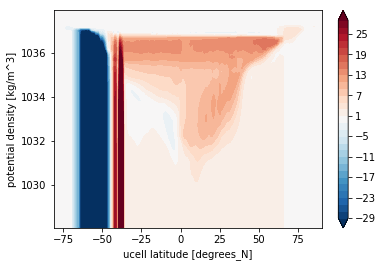

In [5]:
expt = '025deg_jra55v13_iaf_gmredi6'
n_files = -34                          ## Last 30 files is last 60 years
time_units = 'days since 1718-01-01'   ## These are to give correct dates
offset = -87658

psi = cc.get_nc_variable(expt,'ocean.nc','ty_trans_rho',
                                        n=n_files,time_units=time_units, offset=offset)

psi=psi*mask

psiGM = cc.get_nc_variable(expt, 'ocean.nc', 'ty_trans_rho_gm',
                              chunks={'potrho': None}, n=n_files,
                              time_units=time_units, offset=offset)

psiGM=psiGM*mask

print(' ------ Here is what the initial dataset looks like ------ ')
print(psi)
print(psiGM)
print(' --------------------------------------------------------- ')
print(' ')

psiGM = psiGM.sum('grid_xt_ocean')*1.0e-9
psi = psi.sum('grid_xt_ocean')*1.0e-9
psi = psi.cumsum('potrho') -  psi.sum('potrho')

psi_net = psi + psiGM

#print(' ------ Here is what the resampled dataset looks like ------ ')
print(psi_net)
#print(' --------------------------------------------------------- ')
#print(' ')

## Plot the mean for the North Atlantic region
psi_net.mean('time').plot.contourf(levels=np.arange(-29,30,2))

## Save the whole dataset
psi.to_netcdf('AMOC_rho_net_025deg.nc')
psi.to_netcdf('AMOC_rho_adv_025deg.nc')
psiGM.to_netcdf('AMOC_rho_GM_025deg.nc')

Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db
 ------ Here is what the initial dataset looks like ------ 
<xarray.DataArray 'ty_trans' (time: 60, st_ocean: 50, yu_ocean: 1080, xt_ocean: 1440)>
dask.array<shape=(60, 50, 1080, 1440), dtype=float32, chunksize=(1, 10, 216, 288)>
Coordinates:
  * xt_ocean  (xt_ocean) float64 -279.9 -279.6 -279.4 ... 79.38 79.62 79.88
  * yu_ocean  (yu_ocean) float64 -81.02 -80.92 -80.81 ... 89.79 89.89 90.0
  * st_ocean  (st_ocean) float64 1.152 3.649 6.565 ... 5.034e+03 5.254e+03
  * time      (time) datetime64[ns] 1958-07-01T12:00:00 ... 2017-06-30T12:00:00
 --------------------------------------------------------- 
 


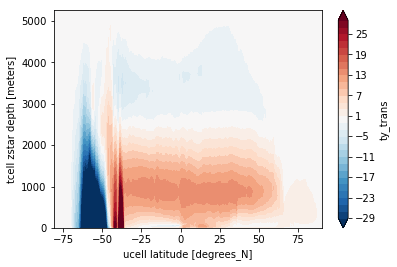

In [6]:
expt = '025deg_jra55v13_iaf_gmredi6'
n_files = -34                          ## Last 30 files is last 60 years
time_units = 'days since 1718-01-01'   ## These are to give correct dates
offset = -87658

psi = cc.get_nc_variable(expt,'ocean.nc','ty_trans',
                                        n=n_files,time_units=time_units, offset=offset)

psi=psi*mask

#missing GM in z space
#psiGM = cc.get_nc_variable(expt, 'ocean.nc', 'ty_trans_gm',
#                              chunks={'st_ocean': None}, n=n_files,
#                              time_units=time_units, offset=offset)

#psiGM=psiGM*mask

print(' ------ Here is what the initial dataset looks like ------ ')
print(psi)
#print(psiGM)
print(' --------------------------------------------------------- ')
print(' ')

#psiGM = psiGM.sum('grid_xt_ocean')*1.0e-9
psi = psi.sum('xt_ocean')*1.0e-9
psi = psi.cumsum('st_ocean') -  psi.sum('st_ocean')

#psi_net = psi + psiGM

#print(' ------ Here is what the resampled dataset looks like ------ ')
#print(psi_net)
#print(' --------------------------------------------------------- ')
#print(' ')

## Plot the mean for the North Atlantic region
psi.mean('time').plot.contourf(levels=np.arange(-29,30,2))

## Save the whole dataset
psi.to_netcdf('AMOC_z_adv_025deg.nc')


In [22]:
#create land sea mask
##old fashioned way
NYFCntrlDir = '/g/data3/hh5/tmp/cosima/access-om2-01/01deg_jra55v13_iaf/output001/ocean'

#Ocean_File = os.path.join(NYFCntrlDir,'ocean_grid.nc')
#print(Ocean_File)
#cntrl=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='time',decode_times=False).load()
#kmu=cntrl.kmu[0].load()
#print(kmu.shape)

#msk=np.zeros((kmu.shape[0],kmu.shape[1]),dtype=float)
#msk.fill(np.nan)
#msk[np.where(kmu>=1)]=1

/g/data3/hh5/tmp/cosima/access-om2-01/01deg_jra55v13_iaf/output001/ocean/ocean_grid.nc
(2700, 3600)


/g/data1/v45/pas561/access-om2_amoc/om2_01_amoc_mask.nc
(1, 2700, 3600)
(2700, 3600)


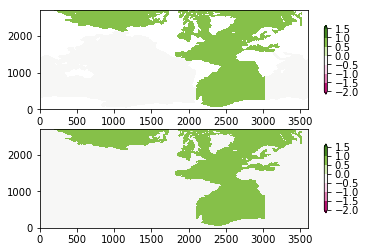

In [5]:
NYFCntrlDir = '/g/data1/v45/pas561/access-om2_amoc/'

Ocean_File = os.path.join(NYFCntrlDir,'om2_01_amoc_mask.nc')
print(Ocean_File)
cntrl=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='time',decode_times=False)
print(cntrl.kmu.shape)
mask=cntrl.kmu[0].load()

plt.subplot(211)
clev = np.arange(-2,2,0.5)
plt.contourf(mask,cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)

print(mask.shape)
#print(mask[250,:])

mask=np.nan_to_num(mask)
#print(mask[250,:])

plt.subplot(212)
clev = np.arange(-2,2,0.5)
plt.contourf(mask,cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)


In [6]:
expt = '01deg_jra55v13_iaf'
n_files = None                          ## For Testing
time_units = 'days since 0001-01-01'   ## These are to give correct dates
offset = None

psi = cc.get_nc_variable(expt,'ocean.nc','ty_trans_rho',
                                        n=n_files,time_units=time_units, offset=offset)

psi = psi.resample(time='A').mean('time')

psi=psi*mask

print(psi.shape)


print(' ------ Here is what the initial dataset looks like ------ ')
print(psi)
print(' --------------------------------------------------------- ')
print(' ')

psi = psi.sum('grid_xt_ocean')*1.0e-9
psi = psi.cumsum('potrho') -  psi.sum('potrho')


#print(' ------ Here is what the resampled dataset looks like ------ ')
#print(' --------------------------------------------------------- ')
#print(' ')

## Plot the mean for the North Atlantic region
#psi.mean('time').plot.contourf(levels=np.arange(-29,30,2))

#of=os.path.join('amoc01.npy')
#a=np.save(of,psi)

print(psi.shape)
## Save the whole dataset
#psi.to_netcdf('AMOC_rho_adv_01deg.nc')

Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db
(33, 80, 2700, 3600)
 ------ Here is what the initial dataset looks like ------ 
<xarray.DataArray 'ty_trans_rho' (time: 33, potrho: 80, grid_yu_ocean: 2700, grid_xt_ocean: 3600)>
dask.array<shape=(33, 80, 2700, 3600), dtype=float32, chunksize=(1, 8, 270, 360)>
Coordinates:
  * time           (time) datetime64[ns] 1985-12-31 1986-12-31 ... 2017-12-31
  * grid_xt_ocean  (grid_xt_ocean) float64 -279.9 -279.8 -279.7 ... 79.85 79.95
  * grid_yu_ocean  (grid_yu_ocean) float64 -81.09 -81.05 -81.0 ... 89.96 90.0
  * potrho         (potrho) float64 1.028e+03 1.028e+03 ... 1.038e+03 1.038e+03
 --------------------------------------------------------- 
 
(33, 80, 2700)


In [9]:
#of=os.path.join('amoc01.npy')
a=np.save('amoc01_v1.npy',psi[0:10,:,:])

KeyboardInterrupt: 

In [11]:
print(psi.shape)

(33, 80, 2700)


In [ ]:
#psi.mean('time').plot.contourf(levels=np.arange(-29,30,2))

## Save the whole dataset
psi.to_netcdf('AMOC_rho_adv_01deg.nc')

CancelledError: store-b2d07a62-7550-11e9-ae24-fa163ebd949f